# Carbon-aware fleet vehicle selection for crews

**Table of contents**

- Overview
- Setup
  - Get Token
- Utility Functions
    - Function to call API
    - Input format for API
    - Accepted input values
- Use Case Implementation
  - Fastest route
  - Shortest route
  - Comparison Between Routes
- Related Links

## Overview

APIs that are used in this sample: **IBM Envizi - Emissions API, Mobile Emissions API**

You can calculate the emissions produced based on the type of vehicle and fuel type for a given route. This approach helps you to choose the most sustainable option for task completion, while balancing operational cost and environmental responsibility.

The U.S. Environmental Protection Agency calculates that the transportation sector generates the largest share, approximately 29%, of Greenhouse Gas Emissions. As a result, carbon-responsible enterprises are focusing on reducing transportation-related emissions where possible. A carbon-aware approach to vehicle selection for crews has the potential to reduce the carbon footprint of an organization, while still fulfilling work orders.

**Business value**
- Reduction of carbon footprint
- Sustainable work order fulfillment

**Use Case**

Consider a scenario where a utility company needs to dispatch a crew for maintenance. We can evaluate a vehicle's emissions based on the vehicle type and fuel type.

For more information on the inputs and output data points for the Emissions API- Mobile endpoint, see the [Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/ghgemissions--ibm-envizi-emissions-api/Mobile) or take a look at the [Data Catalog](https://emissions.app.ibm.com/factor-catalog).



![carbon_aware_crew_scheduling.png](carbon_aware_crew_scheduling.png)

## Setup

Ensure that Python 3+ is installed on your system.


<b>Note:</b> To run this notebook, you must first add your credentials to `'../../../auth/secrets.ini'` in the following format:

```
[EAPI]
api.api_key = <Your Emissions API Key>
api.tenant_id = <Your Emissions API Tenant Id>
api.org_id = <Your Emissions API Org Id>

```

In [ ]:
# Install the prerequisite Python packages
%pip install pandas configparser json IPython matplotlib

In [1]:
import pandas as pd
import configparser
import requests
import json
from IPython.display import display as display_summary
import matplotlib.pyplot as plt

### Authorization Token

Run the following code snippet to generate a Bearer Token by using your api_key configured in secrets.ini.

In [2]:
config = configparser.RawConfigParser()
config.read(['../../../auth/secrets.ini','../../../auth/config.ini'])

EAPI_API_KEY        = config.get('EAPI', 'api.api_key')
EAPI_TENANT_ID      = config.get('EAPI', 'api.tenant_id')
EAPI_CLIENT_ID      = 'ghgemissions-' + EAPI_TENANT_ID
EAPI_ORG_ID         = config.get('EAPI', 'api.org_id')

EAPI_AUTH_CLIENT_ID = 'saascore-' + EAPI_TENANT_ID
EAPI_AUTH_ENDPOINT  = config.get('EAPI', 'api.auth_endpoint')

EAPI_BASE_URL       = config.get('EAPI', 'api.base_url')
EAPI_ENDPOINT       = f"{EAPI_BASE_URL}/mobile"

auth_request_headers: dict = {}
auth_request_headers["X-IBM-Client-Id"] = EAPI_AUTH_CLIENT_ID
auth_request_headers["X-API-Key"] = EAPI_API_KEY

verify = True

auth_url = f"{EAPI_AUTH_ENDPOINT}/api-key?orgId={EAPI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


## Use Case Implementation

### Petrol

Now, using the Mobile Emissions API, calculate the emissions for a petrol vehicle. 

In [3]:
petrol_payload = {
  "activity": {
    "type": "Passenger Vehicles - Medium Car - Petrol",
    "value": 100,
    "unit": "mi"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}

In [4]:
# Create the query headers
request_headers: dict = {}
request_headers["Content-Type"] = "application/json"
request_headers["x-ibm-client-id"] = EAPI_CLIENT_ID
request_headers["Authorization"] = "Bearer " + jwt_token

In [5]:
# Submit the request
petrol_response = requests.post(EAPI_ENDPOINT, 
                                headers = request_headers, 
                                data = json.dumps(petrol_payload))

In [6]:
if petrol_response.text != "":
    # Get the response as json
    response_json = petrol_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

transactionId  totalCO2e        CO2       CH4  \
0  ad4f34c3-75b8-4515-8ec8-ee7bfe62e628  28.527232  28.417796  0.057936   

        N2O    unit  \
0  0.051499  kgCO2e   

                                                                                                                                         description  
0  The passenger vehicles - medium car - petrol emissions factor used to calculate this result was obtained from the 2024 Managed - DEFRA factor set

### Diesel

Using the Emissions API- Mobile endpoint, calculate the emissions for a diesel vehicle.

In [7]:
diesel_payload = {
  "activity": {
    "type": "Passenger Vehicles - Medium Car - Diesel",
    "value": 100,
    "unit": "mi"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}

In [8]:
# Create the query headers
request_headers: dict = {}
request_headers["Content-Type"] = "application/json"
request_headers["x-ibm-client-id"] = EAPI_CLIENT_ID
request_headers["Authorization"] = "Bearer " + jwt_token

In [9]:
# Submit the request
diesel_response = requests.post(EAPI_ENDPOINT, 
                                headers = request_headers, 
                                data = json.dumps(diesel_payload))

In [10]:
if diesel_response.text != "":
    # Get the response as json
    response_json = diesel_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

transactionId  totalCO2e        CO2      N2O  \
0  d17e04f7-79bf-45b1-a9b2-8d47e6f9ef3c  27.048245  26.779484  0.26876   

     unit  \
0  kgCO2e   

                                                                                                                                         description  
0  The passenger vehicles - medium car - diesel emissions factor used to calculate this result was obtained from the 2024 Managed - DEFRA factor set

### Hybrid

Using the Emissions API- Mobile endpoint, calculate the emissions for a hybrid vehicle.

In [11]:
hybrid_payload = {
  "activity": {
    "type": "Passenger Vehicles - Medium Car - Hybrid",
    "value": 100,
    "unit": "mi"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}

In [12]:
# Create the query headers
request_headers: dict = {}
request_headers["Content-Type"] = "application/json"
request_headers["x-ibm-client-id"] = EAPI_CLIENT_ID
request_headers["Authorization"] = "Bearer " + jwt_token

In [13]:
# Submit the request
hybrid_response = requests.post(EAPI_ENDPOINT, 
                                headers = request_headers, 
                                data = json.dumps(hybrid_payload))

In [14]:
if hybrid_response.text != "":
    # Get the response as json
    response_json = hybrid_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

transactionId  totalCO2e        CO2       CH4  \
0  0cd3e0a6-3fe2-460c-a3e8-3005e8d19a7b  18.491363  18.296632  0.027359   

        N2O    unit  \
0  0.167372  kgCO2e   

                                                                                                                                         description  
0  The passenger vehicles - medium car - hybrid emissions factor used to calculate this result was obtained from the 2024 Managed - DEFRA factor set

You can check the accepted values for the individual fields of the request payload. For more information, see [Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/ghgemissions--ibm-envizi-emissions-api/Mobile).

### Comparison Between Vehicles

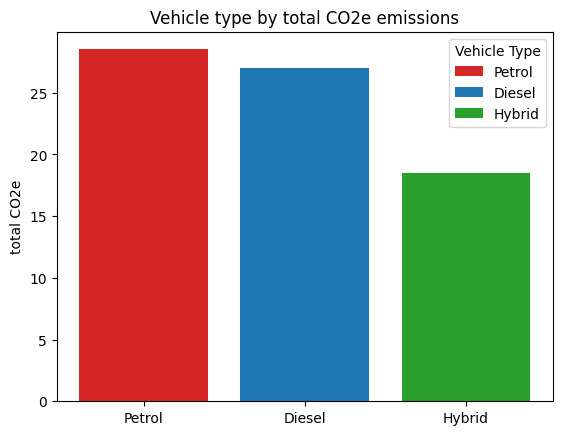

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

vehicles = ['Petrol', 'Diesel', 'Hybrid']
emissions = [round(petrol_response.json()['totalCO2e'], 3),
             round(diesel_response.json()['totalCO2e'], 3),
             round(hybrid_response.json()['totalCO2e'], 3)]
bar_labels = ['Petrol', 'Diesel', 'Hybrid']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(vehicles, emissions, label=bar_labels, color=bar_colors)

ax.set_ylabel('total CO2e')
ax.set_title('Vehicle type by total CO2e emissions')
ax.legend(title='Vehicle Type')

plt.show()

## Related Links

[Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/ghgemissions--ibm-envizi-emissions-api/Introduction)